<img src="https://i.postimg.cc/jdgWdX7f/i-RIS-PROJECT.png">

<img src = "https://i.postimg.cc/NjbLPxgF/iris-hd.jpg">

# SETUP ⚙️

In [129]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #Eliminar warnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Automcompletar rápido
%config IPCompleter.greedy=True


/kaggle/input/iris-flower-dataset/IRIS.csv


In [130]:
datos = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
datos

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,Iris-virginica
146,6.30,2.50,5.00,1.90,Iris-virginica
147,6.50,3.00,5.20,2.00,Iris-virginica
148,6.20,3.40,5.40,2.30,Iris-virginica


In [131]:
ruta_outputs= "/kaggle/working/"
val = datos.sample(frac = 0.3)
val.shape

(45, 5)

In [132]:
trabajo = datos.loc[~datos.index.isin(val.index)]
trabajo.shape

(105, 5)

In [133]:
val.to_csv(ruta_outputs + "Validacion.csv")

In [134]:
trabajo.to_csv(ruta_outputs + "Trabajo.csv")

# CALIDAD DE DATOS 🛠️

## Informacion DataFrame

In [135]:
df = pd.read_csv(ruta_outputs + "Trabajo.csv",index_col=0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa
5,5.40,3.90,1.70,0.40,Iris-setosa
...,...,...,...,...,...
143,6.80,3.20,5.90,2.30,Iris-virginica
144,6.70,3.30,5.70,2.50,Iris-virginica
145,6.70,3.00,5.20,2.30,Iris-virginica
146,6.30,2.50,5.00,1.90,Iris-virginica


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


## Conteo de valores

In [137]:
df.species.value_counts()

species
Iris-virginica     37
Iris-setosa        36
Iris-versicolor    32
Name: count, dtype: int64

In [138]:
df.species.value_counts(normalize = True)*100

species
Iris-virginica    35.24
Iris-setosa       34.29
Iris-versicolor   30.48
Name: proportion, dtype: float64

## Valores unicos

In [139]:
df.nunique().sort_values()

species          3
sepal_width     21
petal_width     22
sepal_length    33
petal_length    37
dtype: int64

## Corrección Duplicados

In [140]:
df.duplicated().sum()

1

In [141]:
df.drop_duplicates(inplace = True)

## Separamos numéricas y catégoricas para revisar


In [142]:
cat = df.select_dtypes(exclude='number').copy()
cat

,species
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
...,...
143,Iris-virginica
144,Iris-virginica
145,Iris-virginica
146,Iris-virginica


In [143]:
num = df.select_dtypes(include = 'number').copy()
num

,sepal_length,sepal_width,petal_length,petal_width
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
5,5.40,3.90,1.70,0.40
...,...,...,...,...
143,6.80,3.20,5.90,2.30
144,6.70,3.30,5.70,2.50
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90


## Corrección Nulos

No tenemos nulos

In [144]:
cat.isna().sum()

species    0
dtype: int64

In [145]:
num.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

## Atipicos

### Metodo 1: Desviaciones tipicas

In [146]:
num_desv_tip = 3

In [147]:
def atipicos_desv_tip(variable, num_desv_tip = 3):
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

In [148]:
def conteo_atipicos(df,variable, num_desv_tip = 3):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

In [149]:
variables_num = num.columns.to_list()
variables_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [150]:
for i in variables_num:
    print('\n' + i + ':\n')
    print(conteo_atipicos(num,i,3))


sepal_length:

Series([], Name: count, dtype: int64)

sepal_width:

sepal_width
4.40    1
Name: count, dtype: int64

petal_length:

Series([], Name: count, dtype: int64)

petal_width:

Series([], Name: count, dtype: int64)


### Metodo 2: Colas

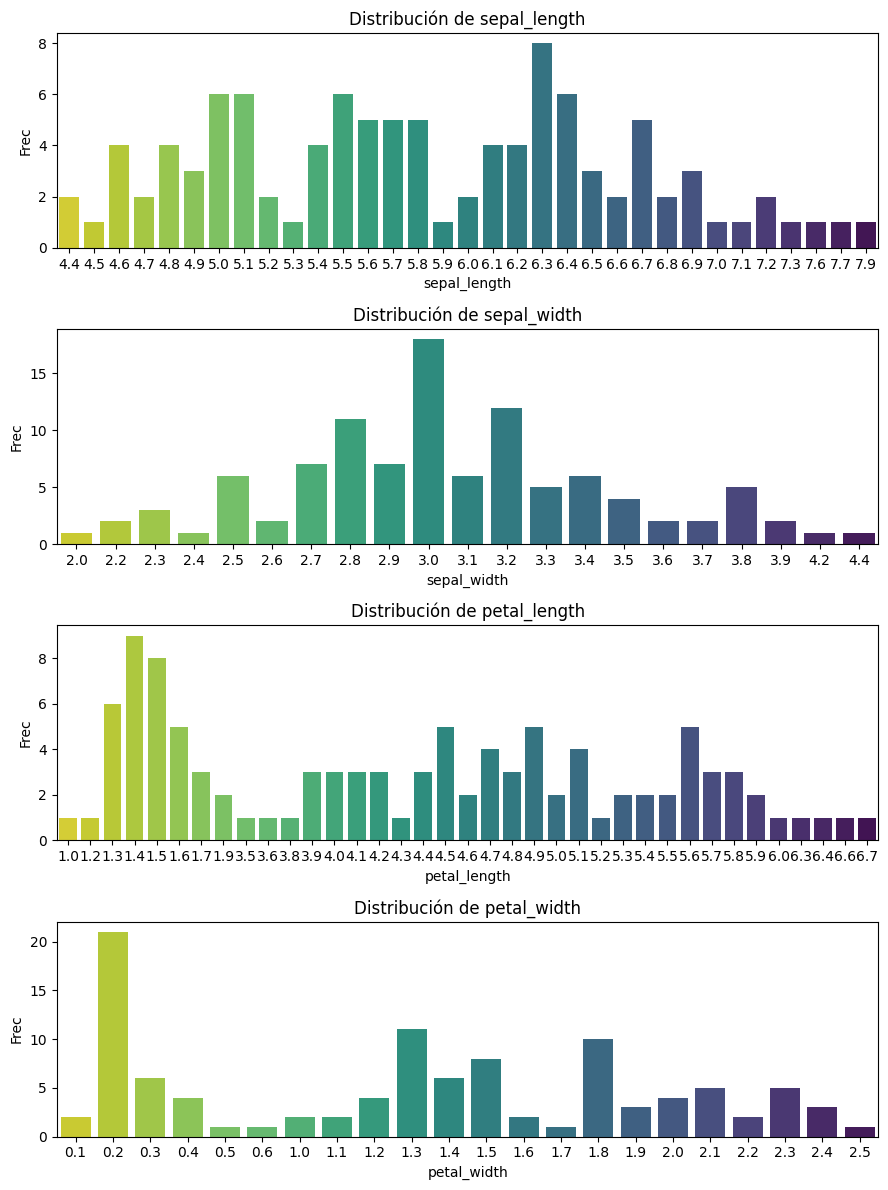

In [151]:
fig, axes = plt.subplots(4,1,figsize=(9, 12))
axes = axes.flatten()

for i ,var in enumerate(variables_num):
    ax = sns.countplot(x=df[var],data = df, palette = 'viridis_r', ax = axes[i])
    ax.set_title('Distribución de '+ var)
    ax.set_xlabel(var)
    ax.set_ylabel('Frec')
    
plt.tight_layout()
plt.show()

Viendo la distribución de frecuencias de cada variable no vemos datos atípicos como para regularizar.

## Guardado de datos

In [152]:
df.to_pickle(ruta_outputs + "trabajo_resultado_calidad_datos.pickle")
cat.to_pickle(ruta_outputs + "cat_resultado_calidad_datos.pickle")
num.to_pickle(ruta_outputs + "num_resultado_calidad_datos.pickle")

# EDA 🔬

## Análisis Estadístico

In [153]:
df.describe().T.style.background_gradient(cmap = 'Purples')

,count,mean,std,min,25%,50%,75%,max
sepal_length,104.000000,5.834615,0.809623,4.400000,5.100000,5.800000,6.400000,7.900000
sepal_width,104.000000,3.055769,0.436408,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,104.000000,3.771154,1.757518,1.000000,1.600000,4.400000,5.100000,6.700000
petal_width,104.000000,1.204808,0.757920,0.100000,0.300000,1.300000,1.800000,2.500000


* sepal_length: Tiene un rango bastante amplio (4.3 cm a 7.7 cm) y una desviación estándar relativamente alta (0.798), lo que indica que hay una variabilidad considerable en el largo del sépalo.
* sepal_width: La variabilidad es menor en comparación con el largo del sépalo, con un rango más estrecho (2.2 cm a 3.9 cm) y una desviación estándar más baja (0.396).
* petal_length: Muestra la mayor desviación estándar (1.742), indicando una alta variabilidad, con valores que varían significativamente (1.1 cm a 6.9 cm).
* petal_width: Tiene una desviación estándar de 0.763 y un rango de valores de 0.1 cm a 2.5 cm, mostrando una variabilidad intermedia entre las otras variables.

In [154]:
num.corr().style.background_gradient(cmap = 'Purples')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.147854,0.877747,0.811861
sepal_width,-0.147854,1.000000,-0.455981,-0.393557
petal_length,0.877747,-0.455981,1.000000,0.959931
petal_width,0.811861,-0.393557,0.959931,1.000000


**Diferenciamos correlaciones negativas bajas o moderadas frente a correlaciones positivas muy altas.**

* Relaciones Fuertes:

sepal_length tiene una alta correlación positiva con petal_length (0.877) y petal_width (0.819).
petal_length y petal_width tienen una correlación extremadamente alta (0.959), lo que indica que estas dos variables están muy estrechamente relacionadas.

* Relaciones Moderadas:

sepal_width tiene una correlación moderadamente negativa con petal_length (-0.430) y petal_width (-0.351).
Relaciones Débiles:

sepal_length y sepal_width tienen una correlación muy baja (-0.144).

## Análisis Visual

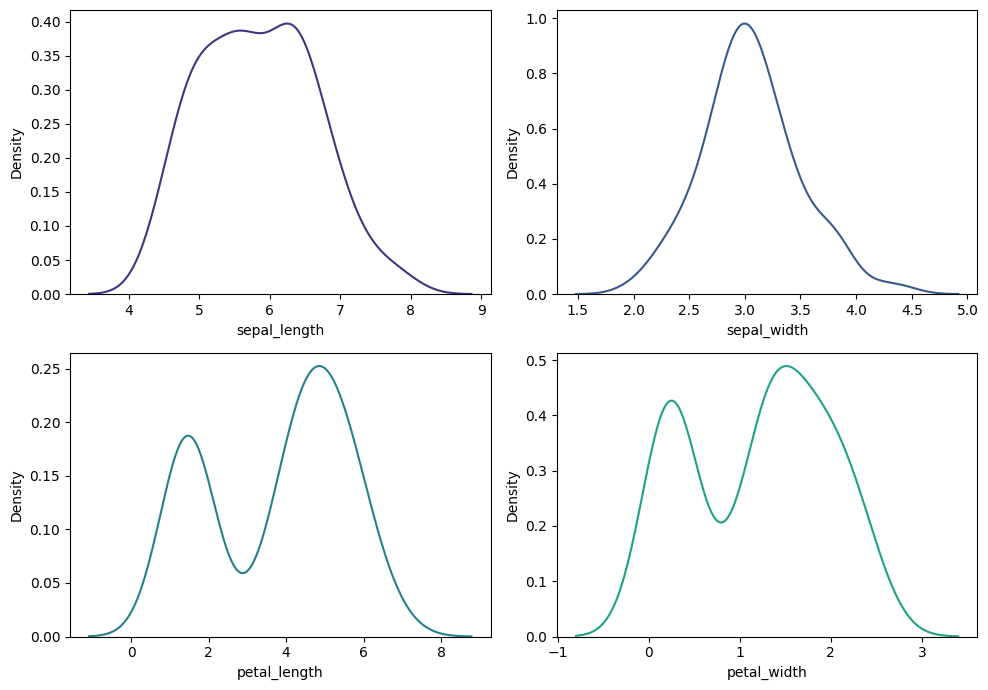

In [155]:
fig, axes = plt.subplots(2,2,figsize=(10, 7))
axes = axes.flatten()
variables_predictoras = df.columns[:-1]
palette = sns.color_palette('viridis')

for i,var in enumerate(variables_predictoras):
    ax = sns.kdeplot(data = df, x = var, color=palette[i],ax = axes[i])

plt.tight_layout()

* Sepal_lenght: 
    - Distribución Normal
* Sepal_width:
    - Distribución Unimodal
* Petal_lenght:
    - Distribución Bimodal
* Petal_width:
    - Distribución Bimodal
    
La distribución bimodal en los pétalos puede corresponder a la diferenciación entre especies, ya que algunas especies de iris tienen pétalos más largos y anchos en comparación con otras.
        
    
 

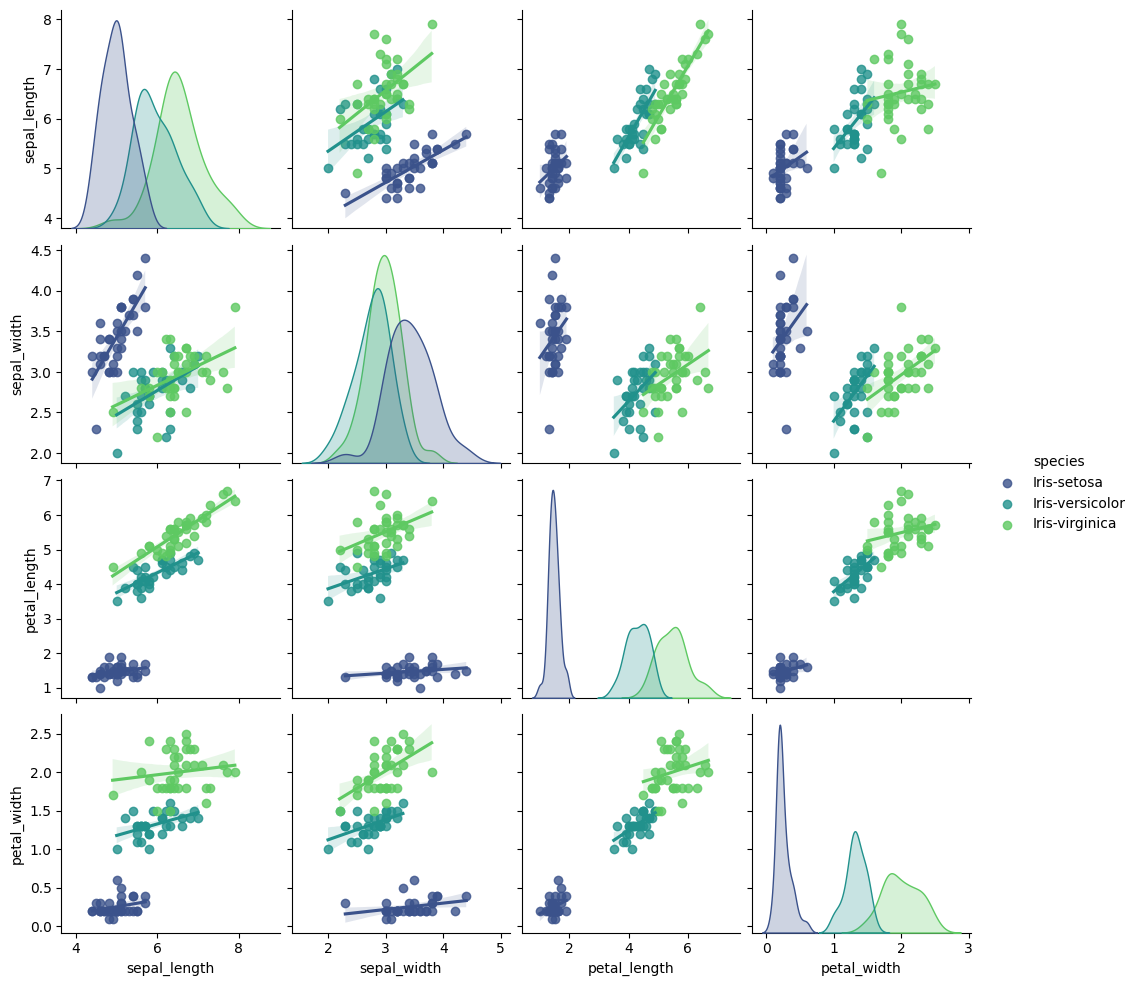

In [156]:
sns.pairplot(df,hue = 'species',kind = 'reg',palette = 'viridis');

Análisis graficos de densidad:

* Sepal length: Las tres especies tienen distribuciones superpuestas, pero Iris-setosa (en azul) tiende a tener sépalos más cortos en comparación con Iris-versicolor (en verde claro) y Iris-virginica (en verde oscuro).
* Sepal width: Iris-setosa muestra sépalos más anchos en comparación con las otras dos especies, mientras que las distribuciones de Iris-versicolor y Iris-virginica son similares.
* Petal length y Petal width: Aquí se observa una clara separación entre las especies, con Iris-setosa teniendo los pétalos más pequeños (tanto en longitud como en ancho), y Iris-virginica mostrando pétalos más largos y anchos en comparación con Iris-versicolor.

Análisis gráficos dispersión:

* Sepal length vs Sepal width: Aunque hay algo de solapamiento entre las especies, Iris-setosa forma un grupo separado con valores más bajos de longitud de sépalo y mayores valores de ancho. Iris-versicolor y Iris-virginica tienen patrones más solapados.
* Sepal length vs Petal length y Sepal length vs Petal width: Se observa una clara tendencia lineal positiva, donde Iris-setosa tiene los valores más bajos, Iris-versicolor se encuentra en el centro y Iris-virginica tiene valores más altos.
* Petal length vs Petal width: Este gráfico destaca una clara diferenciación entre las especies. Iris-setosa está claramente separada del resto, mientras que Iris-versicolor y Iris-virginica muestran cierta superposición pero aún se pueden distinguir.

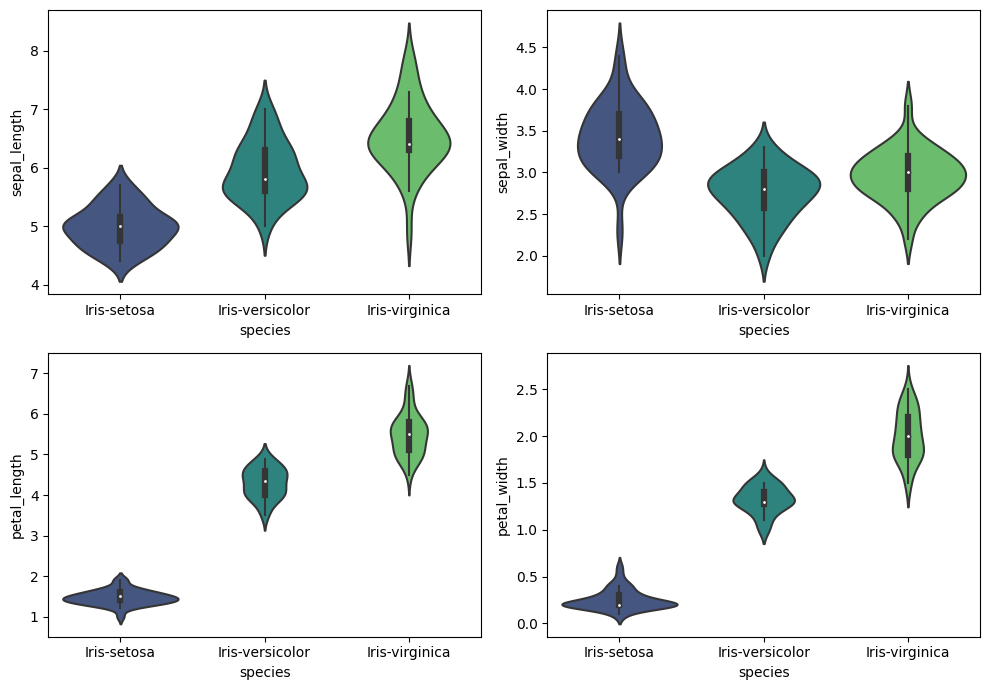

In [157]:
variables_predictoras = df.columns[:-1]
fig, axes = plt.subplots(2,2,figsize=(10, 7))
axes = axes.flatten()
#fig.patch.set_facecolor('lavender') 
for i ,var in enumerate(variables_predictoras):
    ax = sns.violinplot(data=df, x='species', y=var,palette = 'viridis', ax = axes[i], fontsize = 14)
    #ax.set_facecolor('lavender')
    #ax.set_title('Distribución de '+ var)
    ax.set_xlabel('species')
    ax.set_ylabel(var)
    
plt.tight_layout()
plt.show()

Interpretación Violinplots:

Forma del Violín: Muestra la densidad de los datos en diferentes rangos. La anchura en un punto indica la densidad de datos en ese rango; áreas más anchas indican una mayor concentración de datos.

Mediana: La línea blanca en el centro del violín representa la mediana de la variable para cada categoría.
Cuartiles: Las líneas del boxplot dentro del violín representan los cuartiles (25% y 75%).

Distribución de Datos: Puedes observar si la distribución es simétrica o sesgada, y si hay varios picos (modas) en los datos.

## Guardado de Datos

In [158]:
cat.to_pickle(ruta_outputs + "cat_resultado_EDA.pickle")
num.to_pickle(ruta_outputs + "num_resultado_EDA.pickle")

# TRANSFORMACIÓN DE DATOS ⚗️

In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Label enconding

In [160]:
from sklearn.preprocessing import LabelEncoder

#Instanciamos
le = LabelEncoder()

#Entrenamos
le.fit(cat['species'])

#Aplicamos
cat['target'] = le.transform(cat['species'])
cat

,species,target
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
5,Iris-setosa,0
...,...,...
143,Iris-virginica,2
144,Iris-virginica,2
145,Iris-virginica,2
146,Iris-virginica,2


In [161]:
#unificamos dataframes

df = pd.concat([num,cat],axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
1,4.90,3.00,1.40,0.20,Iris-setosa,0
2,4.70,3.20,1.30,0.20,Iris-setosa,0
3,4.60,3.10,1.50,0.20,Iris-setosa,0
4,5.00,3.60,1.40,0.20,Iris-setosa,0
5,5.40,3.90,1.70,0.40,Iris-setosa,0
...,...,...,...,...,...,...
143,6.80,3.20,5.90,2.30,Iris-virginica,2
144,6.70,3.30,5.70,2.50,Iris-virginica,2
145,6.70,3.00,5.20,2.30,Iris-virginica,2
146,6.30,2.50,5.00,1.90,Iris-virginica,2


## Reescalado de variables

In [162]:
df.iloc[:,:4].columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [163]:
#vamos a usar la técnica MinMax.

var_mms = df.iloc[:,:4].columns

#instanciar
mms = MinMaxScaler()

#Entrenar

df_mms = mms.fit_transform(df[var_mms])

In [164]:
#Preparamos el nombre de las columnas del nuevo dataframe reescalado.
nombres_var_mms = [i + '_mms' for i in var_mms]
nombres_var_mms

['sepal_length_mms', 'sepal_width_mms', 'petal_length_mms', 'petal_width_mms']

In [165]:
df_mms = pd.DataFrame(df_mms,index = df.index,columns=nombres_var_mms)
df_mms

,sepal_length_mms,sepal_width_mms,petal_length_mms,petal_width_mms
1,0.14,0.42,0.07,0.04
2,0.09,0.50,0.05,0.04
3,0.06,0.46,0.09,0.04
4,0.17,0.67,0.07,0.04
5,0.29,0.79,0.12,0.12
...,...,...,...,...
143,0.69,0.50,0.86,0.92
144,0.66,0.54,0.82,1.00
145,0.66,0.42,0.74,0.92
146,0.54,0.21,0.70,0.75


In [166]:
#unimos dataframes
df_tablon = pd.concat([df,df_mms],axis = 1)

In [167]:
df_tablon[['species','target']].value_counts()

species          target
Iris-virginica   2         37
Iris-setosa      0         35
Iris-versicolor  1         32
Name: count, dtype: int64

In [168]:
df_tablon = df_tablon.drop(columns = 'species').copy()
df_tablon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 148
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length      104 non-null    float64
 1   sepal_width       104 non-null    float64
 2   petal_length      104 non-null    float64
 3   petal_width       104 non-null    float64
 4   target            104 non-null    int64  
 5   sepal_length_mms  104 non-null    float64
 6   sepal_width_mms   104 non-null    float64
 7   petal_length_mms  104 non-null    float64
 8   petal_width_mms   104 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 12.2 KB


In [169]:
df_tablon.to_pickle(ruta_outputs + "df_tablon.pickle")

# PRESELECCIÓN DE VARAIBLES ✂️

Usamos el metodo de preselección de variables RFE pero visto que nos descarta todas las variables de reescalado hacemos también el métedo de Mutual information, finalmente no vamos a descartar ninguna variable.

In [170]:
df = df_tablon

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

## Recursive Feature Elimination

In [172]:
x = df.drop(columns = 'target').copy()
y =  df['target'].copy()

In [173]:
x

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_mms,sepal_width_mms,petal_length_mms,petal_width_mms
1,4.90,3.00,1.40,0.20,0.14,0.42,0.07,0.04
2,4.70,3.20,1.30,0.20,0.09,0.50,0.05,0.04
3,4.60,3.10,1.50,0.20,0.06,0.46,0.09,0.04
4,5.00,3.60,1.40,0.20,0.17,0.67,0.07,0.04
5,5.40,3.90,1.70,0.40,0.29,0.79,0.12,0.12
...,...,...,...,...,...,...,...,...
143,6.80,3.20,5.90,2.30,0.69,0.50,0.86,0.92
144,6.70,3.30,5.70,2.50,0.66,0.54,0.82,1.00
145,6.70,3.00,5.20,2.30,0.66,0.42,0.74,0.92
146,6.30,2.50,5.00,1.90,0.54,0.21,0.70,0.75


In [174]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

In [175]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, random_state=None, ...))

In [176]:
x.columns[rfe.support_]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## Mutual Information

In [214]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

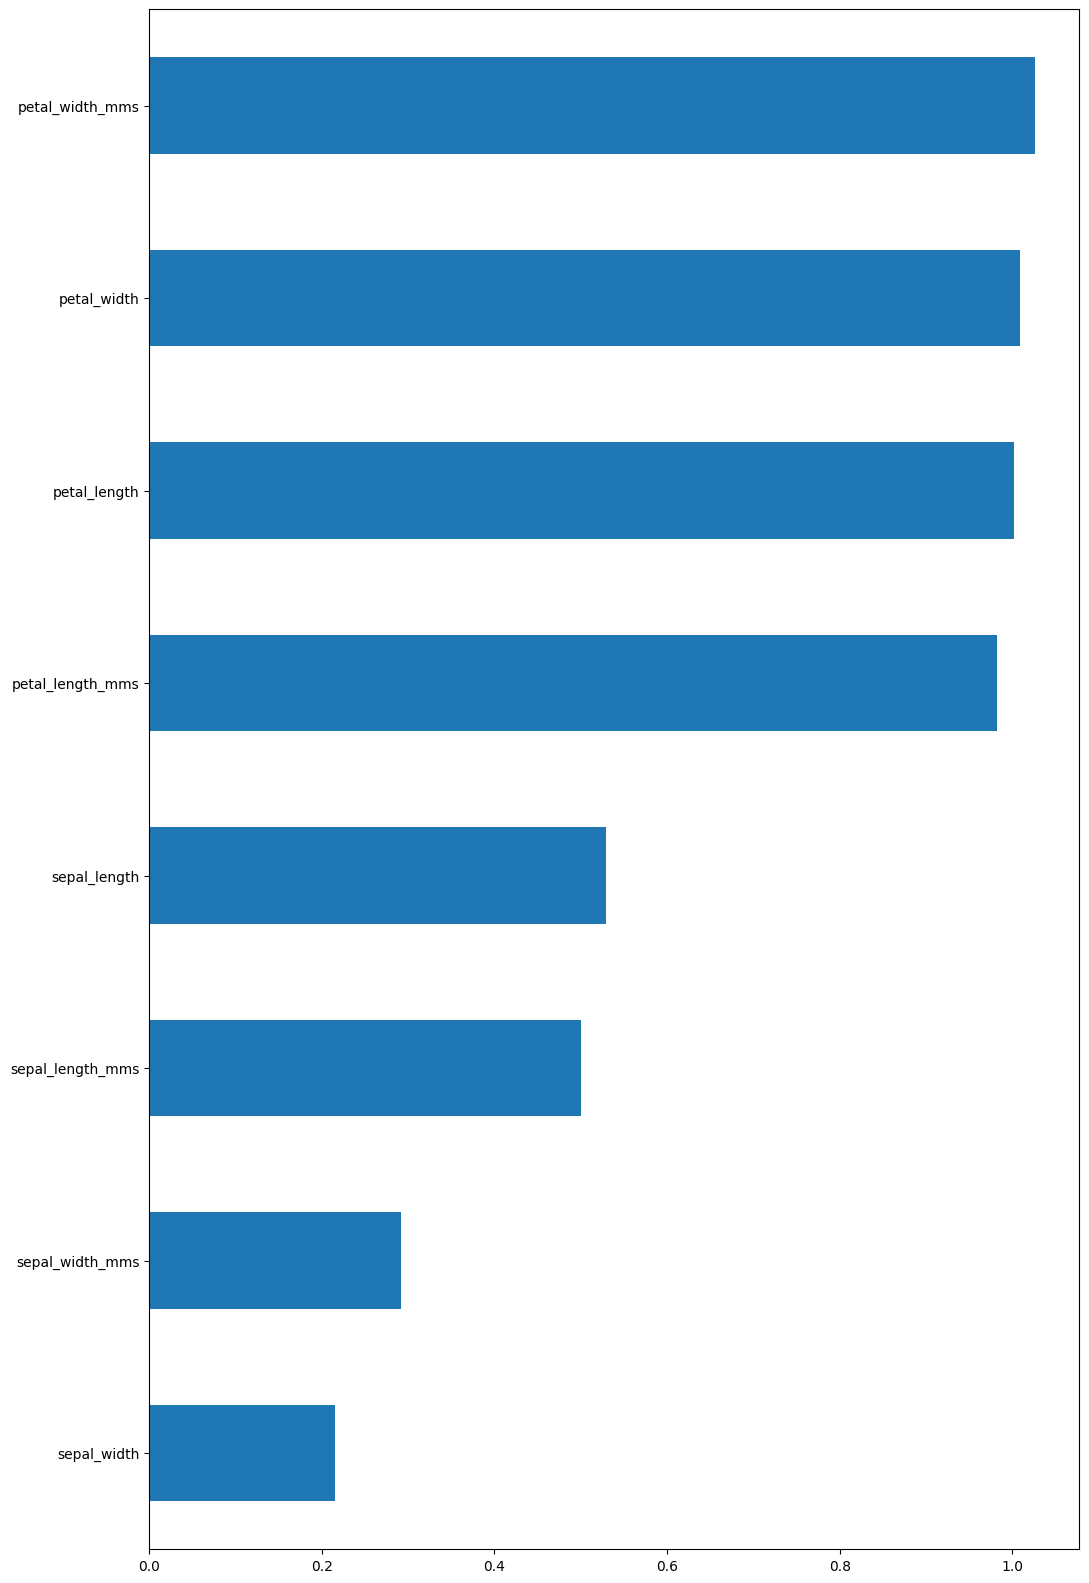

In [215]:

mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [179]:
x.to_pickle(ruta_outputs + 'x_final')
y.to_pickle(ruta_outputs + 'y_final')

# MODELIZACIÓN 🚀

In [180]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#ME ESTA DANDO ERROR REVISAR #import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

from sklearn.neighbors import KNeighborsClassifier

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [181]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size = 0.3)

Vamos a Realizar el método GridSearch con varios modelos de clasificación.

In [182]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [
    {
       'algoritmo': [RandomForestClassifier()],
       'algoritmo__n_jobs': [-1],
       'algoritmo__max_depth': [5,10,15],
       'algoritmo__n_estimators': [50,100,200]},
    {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
    {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]},
    {'algoritmo': [KNeighborsClassifier()],
     'algoritmo__n_neighbors': [3,6,9,12,15,18,21],
     'algoritmo__n_jobs': [-1]}
]

In [183]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc_ovo',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__learning_rate,param_algoritmo__reg_alpha,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.20,0.01,0.04,0.01,"RandomForestClassifier(max_depth=5, n_estimato...",5,50,-1,NaN,NaN,...,NaN,NaN,NaN,{'algoritmo': RandomForestClassifier(max_depth...,1.00,1.00,1.00,1.00,0.00,1
148,0.55,0.01,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",5,1000,-1,0.03,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",1.00,1.00,1.00,1.00,0.00,1
149,0.58,0.01,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",5,1000,-1,0.03,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",1.00,1.00,1.00,1.00,0.00,1
150,0.59,0.01,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",5,1000,-1,0.03,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",1.00,1.00,1.00,1.00,0.00,1
151,0.58,0.01,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",5,1000,-1,0.03,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",1.00,1.00,1.00,1.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.06,0.01,0.02,0.00,HistGradientBoostingClassifier(),10,NaN,NaN,0.10,NaN,...,50,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
508,0.09,0.00,0.02,0.00,HistGradientBoostingClassifier(),10,NaN,NaN,0.10,NaN,...,100,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
509,0.17,0.01,0.03,0.00,HistGradientBoostingClassifier(),10,NaN,NaN,0.10,NaN,...,200,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
500,0.23,0.07,0.03,0.01,HistGradientBoostingClassifier(),10,NaN,NaN,0.05,NaN,...,200,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449


In [184]:
#Mejor modelo:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        n_jobs=-1))])

In [185]:
#Predecimos
pred = modelo.best_estimator_.predict_proba(val_x)
pred

array([[0.        , 0.98      , 0.02      ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.00666667, 0.99333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.98      , 0.02      ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.74      , 0.26      ],
       [0.        , 0.82      , 0.18      ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.98      , 0.02      ],
       [0.        , 0.04      , 0.96      ],
       [0.        , 0.08      , 0.92      ],
       [0.12      , 0.88      , 0.        ],
       [0.        , 0.00666667, 0.99333333],
       [0.        , 0.68666667, 0.31333333],
       [0.

He generado una matriz con las probabilidades para cada una de las tres clases de Iris:

0- Iris-setosa

1- Iris-versicolor

2- Iris-virginica


Cada fila idica la probabilidad asiganada a cada tipo de Iris según los valores de las variables correspondientes a cada caso.

Observamos que se diferencian perfectamente.
Estando el Iris tipo 0 definido con mucha más claridad. 

In [186]:
roc_auc = roc_auc_score(val_y, pred, multi_class='ovo')
roc_auc

0.9983974358974358

Hemos calculado el AUC-ROC (enfoque OvO para multiclase) y nos da un valor de casi 1, lo que indica que nuestro modelo de clasificación asigna la probabilidad más alta a la clase correcta en todos o casi todos los casos del dataset de validadción analizados.

In [187]:
#Mostramos directamente el valor final predicho.
pred_y = np.argmax(pred,axis=1)
pred_y

array([1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 2])

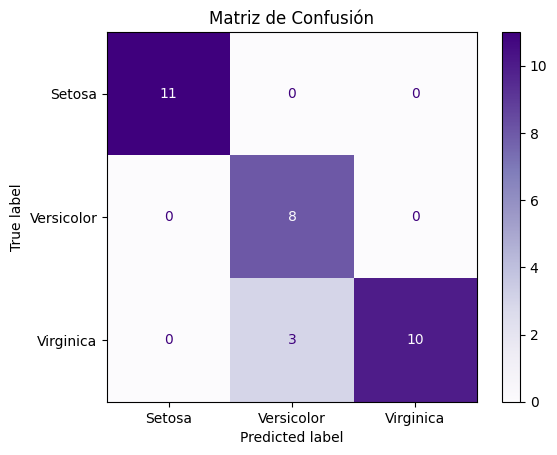

In [188]:
#Matriz de confusión

cm = confusion_matrix(val_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot(cmap='Purples')
plt.title("Matriz de Confusión")
plt.show()


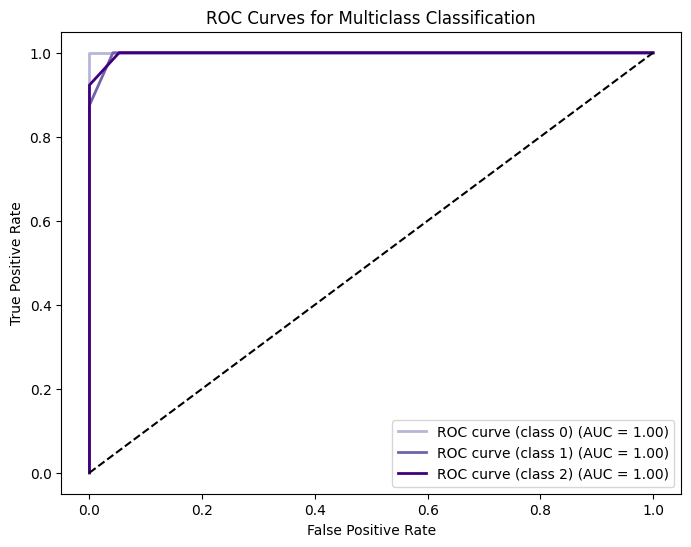

In [211]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

val_y
y_bin = label_binarize(val_y,classes = [0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each ROC curve
colors = cycle(plt.cm.Purples(np.linspace(0.4, 1, 3)))

plt.figure(figsize=(8, 6))
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="best")
plt.show()


Vemos un ligerísimo desvío en la predicción correspondiente a las predicciones de las clase 1 y 2. Podríamos decir que el modelo tiene una capacidad predictiva casi perfecta con respecto alos datos de validación aportados.